In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv("probes.csv", sep=';')

In [3]:
df1.head()

,Num,Hybridization REF,position,gene,chrome,p_vals,mean_cebpa_mut,mean_no_cebpa_mut,mean_cebpa - mean_no_cebpa,site_status,fdr
0,1,cg00000029,53468112,RBL2,16,2.760000e-06,0.734078,0.529800,0.204278,no_peak_site,1.721760e-04
1,2,cg00000236,42263294,VDAC3,8,5.090000e-14,0.892625,0.767645,0.124981,no_peak_site,5.850000e-11
2,3,cg00000289,69341139,ACTN1,14,4.850044e-02,0.835965,0.794356,0.041609,no_peak_site,2.426926e-01
3,4,cg00000292,28890100,ATP2A1,16,1.872712e-02,0.852422,0.806690,0.045732,no_peak_site,1.346666e-01
4,5,cg00000321,41167802,SFRP1,8,3.752884e-02,0.575149,0.458682,0.116468,no_peak_site,2.086038e-01


In [4]:
pos = pd.read_csv("poix.csv")

In [5]:
pos.head()

,position,Status
0,58858635,Background
1,58861702,Background
2,52645399,Background
3,7277833,Background
4,7258022,Background


In [6]:
pos.shape

(271800, 2)

In [7]:
pos2 = pos.drop_duplicates()

In [8]:
pos2.shape

(271799, 2)

In [9]:
ex = df1.merge(pos2, on = 'position', how = 'outer', indicator=True)

In [10]:
ex.sample(10)

,Num,Hybridization REF,position,gene,chrome,p_vals,mean_cebpa_mut,mean_no_cebpa_mut,mean_cebpa - mean_no_cebpa,site_status,fdr,Status,_merge
217855,217681,cg18881778,120241287,CIT,12,0.609243,0.976986,0.977743,-0.000757,no_peak_site,0.811906,Background,both
24961,24897,cg01921773,75661691,KARS,16,0.177127,0.334227,0.429710,-0.095483,peak_site,0.483823,Background,both
152479,152281,cg12948116,14518926,ATF7IP,12,0.419418,0.062552,0.056850,0.005702,no_peak_site,0.694729,Background,both
278454,278353,cg24922090,140751608,PCDHGA4;PCDHGB3;PCDHGA1;PCDHGA5;PCDHGB1;PCDHGA...,5,0.047525,0.841959,0.782016,0.059943,no_peak_site,0.239840,Background,both
264766,264649,cg23621779,30658957,NRM,6,0.898428,0.119631,0.118802,0.000829,no_peak_site,0.958903,Background,both
243045,242894,cg21431091,201124025,TMEM9,1,0.003178,0.444184,0.211779,0.232404,no_peak_site,0.040107,hypermethylation,both
235324,235165,cg20643768,10723095,TMEM14C,6,0.830944,0.033444,0.032987,0.000457,peak_site,0.928144,Background,both
121262,121071,cg10001172,70229028,DNA2,10,0.720742,0.815934,0.822792,-0.006858,no_peak_site,0.873620,Background,both
256687,256550,cg22848982,3697631,LRRC47,1,0.882119,0.967732,0.968320,-0.000589,no_peak_site,0.951559,Background,both
170737,170534,cg14449571,223520861,FARSB,2,0.284819,0.023843,0.018939,0.004904,no_peak_site,0.595273,Background,both


In [11]:
binding = []
for j in list(ex['_merge']):
    if j == 'both':
        binding.append('binding')
    else:
        binding.append('no binding')

print(binding)

ex['binding'] = binding

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [12]:
ex.sample(10)

,Num,Hybridization REF,position,gene,chrome,p_vals,mean_cebpa_mut,mean_no_cebpa_mut,mean_cebpa - mean_no_cebpa,site_status,fdr,Status,_merge,binding
281145,281049,cg25194273,53191387,HNRNPA1L2,13,0.847097,0.038656,0.038930,-0.000274,no_peak_site,0.935944,Background,both,binding
143366,143164,cg12053004,221057751,HLX,1,0.875288,0.881180,0.882667,-0.001487,no_peak_site,0.948624,Background,both,binding
39820,39723,cg03081675,154540097,IPCEF1;OPRM1,6,0.010559,0.355093,0.628181,-0.273088,no_peak_site,0.092351,Background,both,binding
44448,44334,cg03459952,58754990,BCAS3,17,0.868435,0.050308,0.050725,-0.000417,no_peak_site,0.945577,Background,both,binding
187259,187061,cg15988320,140868422,PCDHGA4;PCDHGC3;PCDHGA12;PCDHGA11;PCDHGA9;PCDH...,5,0.382074,0.390759,0.349449,0.041310,no_peak_site,0.669575,Background,both,binding
15331,15293,cg01147714,173686002,RAPGEF4,2,0.026185,0.934184,0.917257,0.016927,no_peak_site,0.166831,Background,both,binding
59117,58979,cg04648747,72233970,TBC1D15,12,0.167426,0.041154,0.036834,0.004319,no_peak_site,0.471231,Background,both,binding
170880,170677,cg14462307,179267556,C5orf45,5,0.209141,0.986489,0.987424,-0.000935,no_peak_site,0.521977,Background,both,binding
168895,168695,cg14296767,30227001,HLA-L,6,0.004881,0.864379,0.731173,0.133205,no_peak_site,0.054349,NaN,left_only,no binding
80258,80089,cg06454464,143427921,TSNARE1,8,0.679410,0.920466,0.924395,-0.003929,no_peak_site,0.851835,Background,both,binding


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/josoga2/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


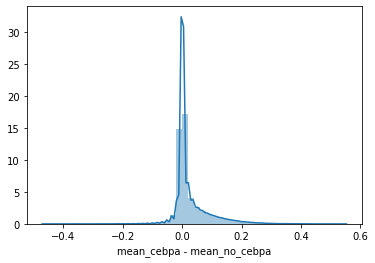

In [14]:
sns.distplot(ex['mean_cebpa - mean_no_cebpa'])

In [16]:
hyp = ex[(ex['mean_cebpa - mean_no_cebpa'] > 0.1) & (ex['fdr']< 0.05)]

In [17]:
bkg = ex[(abs(ex['mean_cebpa - mean_no_cebpa']) <= 0.1) & (ex['fdr']>= 0.05)]

In [18]:
hyp.head(1)

,Num,Hybridization REF,position,gene,chrome,p_vals,mean_cebpa_mut,mean_no_cebpa_mut,mean_cebpa - mean_no_cebpa,site_status,fdr,Status,_merge,binding
0,1,cg00000029,53468112,RBL2,16,0.000003,0.734078,0.5298,0.204278,no_peak_site,0.000172,hypermethylation,both,binding


In [19]:
bkg.head(1)

,Num,Hybridization REF,position,gene,chrome,p_vals,mean_cebpa_mut,mean_no_cebpa_mut,mean_cebpa - mean_no_cebpa,site_status,fdr,Status,_merge,binding
2,3,cg00000289,69341139,ACTN1,14,0.0485,0.835965,0.794356,0.041609,no_peak_site,0.242693,Background,both,binding


In [20]:
print(hyp.shape)
print(bkg.shape)

(11980, 14)
(259870, 14)


In [21]:
newEx = pd.concat([hyp, bkg])

In [22]:
newEx.shape

(271850, 14)

In [23]:
ex.shape

(307846, 14)

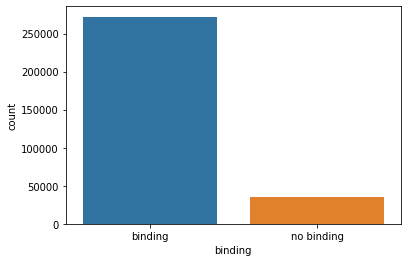

In [24]:
sns.countplot(ex['binding'])

In [25]:
ex['binding'].value_counts()

binding       272131
no binding     35715
Name: binding, dtype: int64

Text(0.5, 0, 'TDF Prediction')

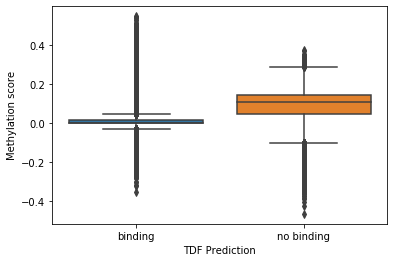

In [26]:
sns.boxplot(x = 'binding', y = 'mean_cebpa - mean_no_cebpa', data = ex )
plt.ylabel('Methylation score')
plt.xlabel('TDF Prediction')

In [27]:
bkg.groupby('binding')['mean_cebpa - mean_no_cebpa'].median()

binding
binding       0.001483
no binding    0.006552
Name: mean_cebpa - mean_no_cebpa, dtype: float64

In [28]:
bkg.groupby('binding')['mean_cebpa - mean_no_cebpa'].std()

binding
binding       0.025758
no binding    0.008666
Name: mean_cebpa - mean_no_cebpa, dtype: float64

Text(0.5, 0, 'TDF Prediction')

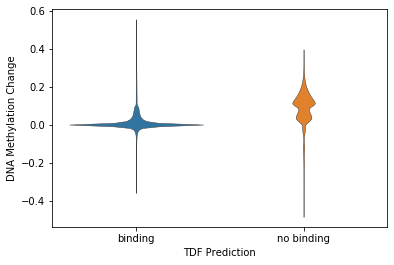

In [48]:
sns.violinplot(x = 'binding', y = 'mean_cebpa - mean_no_cebpa', data = ex, inner=None, linewidth=0.5)
plt.ylabel('DNA Methylation Change')
plt.xlabel('TDF Prediction')

In [31]:
from scipy import stats

np.random.seed(101)

binding = ex.groupby('binding').get_group('binding')

noBinding = ex.groupby('binding').get_group('no binding')



In [32]:
binding.head()

,Num,Hybridization REF,position,gene,chrome,p_vals,mean_cebpa_mut,mean_no_cebpa_mut,mean_cebpa - mean_no_cebpa,site_status,fdr,Status,_merge,binding
0,1,cg00000029,53468112,RBL2,16,2.760000e-06,0.734078,0.529800,0.204278,no_peak_site,1.721760e-04,hypermethylation,both,binding
1,2,cg00000236,42263294,VDAC3,8,5.090000e-14,0.892625,0.767645,0.124981,no_peak_site,5.850000e-11,hypermethylation,both,binding
2,3,cg00000289,69341139,ACTN1,14,4.850044e-02,0.835965,0.794356,0.041609,no_peak_site,2.426926e-01,Background,both,binding
3,4,cg00000292,28890100,ATP2A1,16,1.872712e-02,0.852422,0.806690,0.045732,no_peak_site,1.346666e-01,Background,both,binding
5,6,cg00000622,23034447,NIPA2,15,5.938082e-02,0.012119,0.011318,0.000801,peak_site,2.734426e-01,Background,both,binding


In [33]:
stats.ttest_ind(binding['mean_cebpa - mean_no_cebpa'], 
                noBinding['mean_cebpa - mean_no_cebpa'], equal_var=False)

Ttest_indResult(statistic=-168.0090771128, pvalue=0.0)

In [34]:
stats.ttest_ind(binding['fdr'], 
                noBinding['fdr'], equal_var=False)

Ttest_indResult(statistic=524.4400597304391, pvalue=0.0)

In [35]:
#from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu

In [36]:
mannwhitneyu(binding['mean_cebpa - mean_no_cebpa'], 
                noBinding['mean_cebpa - mean_no_cebpa'])

MannwhitneyuResult(statistic=1503651105.0, pvalue=0.0)

In [37]:
binding.to_csv('binding.csv', sep=',', header=True, index=False)

In [38]:
noBinding.to_csv('noBinding.csv', sep=',', header=True, index=False)

## BED Exports

In [39]:
binding.head(0)

,Num,Hybridization REF,position,gene,chrome,p_vals,mean_cebpa_mut,mean_no_cebpa_mut,mean_cebpa - mean_no_cebpa,site_status,fdr,Status,_merge,binding


In [40]:
bindingBed = binding[['chrome', 'position', 'gene']]
bindingBed['start'] = bindingBed['position'] - 50
bindingBed['end'] = bindingBed['position'] + 50
bindingBed = bindingBed[['chrome', 'start', 'end', 'gene']]
bindingBed.head()

/home/josoga2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/josoga2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,chrome,start,end,gene
0,16,53468062,53468162,RBL2
1,8,42263244,42263344,VDAC3
2,14,69341089,69341189,ACTN1
3,16,28890050,28890150,ATP2A1
5,15,23034397,23034497,NIPA2


In [41]:
nobindingBed = noBinding[['chrome', 'position', 'gene']]
nobindingBed['start'] = nobindingBed['position'] - 50
nobindingBed['end'] = nobindingBed['position'] + 50
nobindingBed = nobindingBed[['chrome', 'start', 'end', 'gene']]
nobindingBed.head()

/home/josoga2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/josoga2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,chrome,start,end,gene
4,8,41167752,41167852,SFRP1
24,16,47008441,47008541,DNAJA2
26,19,39798431,39798531,LRFN1
29,8,144120349,144120449,C8orf31
45,1,57888657,57888757,DAB1


In [42]:
bindingBed['chrome'] = 'chr' + bindingBed.chrome.map(str)
nobindingBed['chrome'] = 'chr' + nobindingBed.chrome.map(str)

In [43]:
bindingBed.head(1)

,chrome,start,end,gene
0,chr16,53468062,53468162,RBL2


In [44]:
bindingBed.to_csv('bindingBed.bed', sep='\t', index=None, header=None )

In [45]:
nobindingBed.to_csv('nobindingBed.bed', sep='\t', index=None, header=None )